# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [3]:
print("A quantidade de nomes masculina é : {}".format(nomes_m.shape[0]))
print("A quantidade de nomes feminina é : {}".format(nomes_f.shape[0]))
print("A quantidade de total nomes  é : " + str(len(nomes_f) + len(nomes_m)))

A quantidade de nomes masculina é : 200
A quantidade de nomes feminina é : 200
A quantidade de total nomes  é : 400


In [4]:
frames = [nomes_f, nomes_m]

In [5]:
nomes = pd.concat(frames)['nome'].to_frame()

In [6]:
nomes.sample(5)

,nome
82,DAVID
105,PABLO
181,IRACEMA
147,LILIAN
127,JULIANO


In [7]:
nomes = nomes.sample(400)
nomes

,nome
166,KELLY
84,FATIMA
96,EVERTON
100,ROSELI
104,EVA
...,...
176,MARA
66,DANILO
67,HENRIQUE
76,TATIANE


In [8]:
nomes.index = range(nomes.shape[0])
nomes

,nome
0,KELLY
1,FATIMA
2,EVERTON
3,ROSELI
4,EVA
...,...
395,MARA
396,DANILO
397,HENRIQUE
398,TATIANE


# Incluindo ID dos alunos 

In [9]:
import numpy as np
np.random.seed(123)

In [10]:
total_alunos = len(nomes)
total_alunos

400

In [11]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [14]:
nomes.sample(5)

,nome,id_aluno
46,FLAVIA,358
159,KAUAN,118
3,ROSELI,156
97,GILMAR,201
264,JEAN,290


In [15]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [18]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [19]:
nomes

,nome,id_aluno,dominio,email
0,KELLY,235,@servicodoemail.com,kelly@servicodoemail.com
1,FATIMA,43,@servicodoemail.com,fatima@servicodoemail.com
2,EVERTON,304,@dominiodoemail.com.br,everton@dominiodoemail.com.br
3,ROSELI,156,@dominiodoemail.com.br,roseli@dominiodoemail.com.br
4,EVA,343,@dominiodoemail.com.br,eva@dominiodoemail.com.br
...,...,...,...,...
395,MARA,231,@servicodoemail.com,mara@servicodoemail.com
396,DANILO,99,@dominiodoemail.com.br,danilo@dominiodoemail.com.br
397,HENRIQUE,323,@dominiodoemail.com.br,henrique@dominiodoemail.com.br
398,TATIANE,383,@servicodoemail.com,tatiane@servicodoemail.com


# Criando a Tabela Curso 

In [20]:
!pip3 install html5lib
!pip3 install lxml

In [21]:
import html5lib

In [24]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [25]:
type(cursos)

list

In [28]:
cursos = cursos[0]

In [29]:
type(cursos)

pandas.core.frame.DataFrame

In [30]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de Cursos

In [33]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [34]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [35]:
cursos['id'] = cursos.index + 1

In [36]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [37]:
cursos = cursos.set_index('id')

In [38]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os alunos nos  cursos

In [44]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [46]:
nomes.sample(10)

,nome,id_aluno,dominio,email,matriculas
11,CAROLINA,218,@dominiodoemail.com.br,carolina@dominiodoemail.com.br,5
3,ROSELI,156,@dominiodoemail.com.br,roseli@dominiodoemail.com.br,3
0,KELLY,235,@servicodoemail.com,kelly@servicodoemail.com,2
213,MARCIO,195,@servicodoemail.com,marcio@servicodoemail.com,2
237,ERICA,123,@servicodoemail.com,erica@servicodoemail.com,3
188,FABIANO,369,@dominiodoemail.com.br,fabiano@dominiodoemail.com.br,4
227,JOSUE,327,@dominiodoemail.com.br,josue@dominiodoemail.com.br,2
384,JAIRO,48,@dominiodoemail.com.br,jairo@dominiodoemail.com.br,1
36,LEILA,338,@servicodoemail.com,leila@servicodoemail.com,2
366,RIAN,385,@servicodoemail.com,rian@servicodoemail.com,2


In [47]:
nomes.matriculas.describe()

count    400.000000
mean       2.105000
std        1.433217
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: matriculas, dtype: float64

In [48]:
import seaborn as sns

C:\Users\porti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

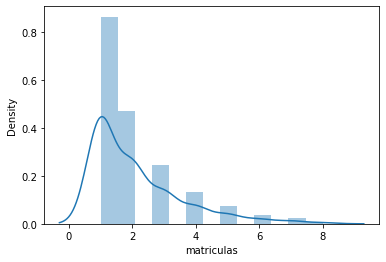

In [49]:
sns.distplot(nomes.matriculas)

In [50]:
nomes.matriculas.value_counts()

1    186
2    101
3     53
4     29
5     16
6      8
7      5
8      2
Name: matriculas, dtype: int64

# Selecionando Cursos 

In [53]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
251,JORGE,175,@servicodoemail.com,jorge@servicodoemail.com,1
184,WILSON,282,@dominiodoemail.com.br,wilson@dominiodoemail.com.br,1
162,MILTON,202,@servicodoemail.com,milton@servicodoemail.com,2


In [56]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [61]:
for index, row in nomes.iterrows() :
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [62]:
matriculas

,id_aluno,id_curso
0,235,13
1,235,6
2,43,13
3,43,10
4,43,2
...,...,...
2521,323,2
2522,383,19
2523,366,10
2524,366,2


In [66]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns ={'id_aluno' : 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,155,Lógica de programação
2,301,Java para Web
3,219,C# para Web
4,193,Ruby on Rails
5,63,Cursos de Python
6,165,PHP com MySql
7,17,.NET para web
8,65,Novas integrações com Java
9,2,TDD com Java


In [70]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns ={'id_aluno' : 'quantidade_de_alunos'})

In [71]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,155,Lógica de programação
2,301,Java para Web
3,219,C# para Web
4,193,Ruby on Rails
5,63,Cursos de Python


# Saída em diferentes formatos

In [73]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,155,Lógica de programação
2,301,Java para Web
3,219,C# para Web


In [75]:
matriculas_por_curso.to_csv('dados/natriculas_por_curso.csv', index = False)

In [76]:
matriculas_json = matriculas_por_curso.to_json()

In [77]:
matriculas_json

'{"quantidade_de_alunos":{"1":155,"2":301,"3":219,"4":193,"5":63,"6":165,"7":17,"8":65,"9":2,"10":242,"11":83,"12":82,"13":273,"14":123,"15":95,"16":19,"17":2,"18":4,"19":176,"20":247},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [79]:
matriculas_html = matriculas_por_curso.to_html()

In [81]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>155</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>301</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>219</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>193</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>63</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>165</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>17</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>65</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>2</

# Criando o banco sql

In [82]:
!pip install sqlalchemy

In [83]:
from sqlalchemy import create_engine, MetaData, Table

In [84]:
engine = create_engine('sqlite:///:memory:')

In [85]:
engine

Engine(sqlite:///:memory:)

In [86]:
type(engine)

sqlalchemy.engine.base.Engine

In [89]:
matriculas_por_curso.to_sql('matriculas', engine)

In [93]:
print(engine.table_names())

['matriculas']


<ipython-input-93-7f622051bbf8>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Buscando do banco sql

In [94]:
query = 'select * from matriculas where quantidade_de_alunos < 20'
pd.read_sql(query,engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,7,17,.NET para web
1,9,2,TDD com Java
2,16,19,Estatística básica
3,17,2,Internet das coisas
4,18,4,Programação funcional


In [97]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,155
1,Java para Web,301
2,C# para Web,219
3,Ruby on Rails,193
4,Cursos de Python,63
5,PHP com MySql,165
6,.NET para web,17
7,Novas integrações com Java,65
8,TDD com Java,2
9,Código limpo com C#,242


In [98]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [102]:
muitas_matriculas.query('quantidade_de_alunos > 100 ')

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,155
1,Java para Web,301
2,C# para Web,219
3,Ruby on Rails,193
5,PHP com MySql,165
9,Código limpo com C#,242
12,Persistência com .NET,273
13,Desenvolvendo jogos,123
18,Boas práticas em Java,176
19,Orientação objetos com Java,247


In [103]:
muitas_matriculas['quantidade_de_alunos'].sum()

2526

In [104]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 100 ')

# Escrevendo no banco 

In [105]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [107]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


<ipython-input-107-7f622051bbf8>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# nomes dos alunos da proxima turma

In [109]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,155,Lógica de programação
2,301,Java para Web
3,219,C# para Web
4,193,Ruby on Rails
5,63,Cursos de Python
6,165,PHP com MySql
7,17,.NET para web
8,65,Novas integrações com Java
9,2,TDD com Java


In [110]:
matriculas

,id_aluno,id_curso
0,235,13
1,235,6
2,43,13
3,43,10
4,43,2
...,...,...
2521,323,2
2522,383,19
2523,366,10
2524,366,2


In [112]:
matriculas.query('id_curso == 16')

,id_aluno,id_curso
224,56,16
459,309,16
472,236,16
598,9,16
604,251,16
658,263,16
759,169,16
852,304,16
912,12,16
1023,221,16


In [116]:
id_curso = 16
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
224,56,16
459,309,16
472,236,16
598,9,16
604,251,16
658,263,16
759,169,16
852,304,16
912,12,16
1023,221,16


In [114]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,KELLY,235,@servicodoemail.com,kelly@servicodoemail.com,2
1,FATIMA,43,@servicodoemail.com,fatima@servicodoemail.com,6
2,EVERTON,304,@dominiodoemail.com.br,everton@dominiodoemail.com.br,3
3,ROSELI,156,@dominiodoemail.com.br,roseli@dominiodoemail.com.br,3
4,EVA,343,@dominiodoemail.com.br,eva@dominiodoemail.com.br,5
...,...,...,...,...,...
395,MARA,231,@servicodoemail.com,mara@servicodoemail.com,1
396,DANILO,99,@dominiodoemail.com.br,danilo@dominiodoemail.com.br,3
397,HENRIQUE,323,@dominiodoemail.com.br,henrique@dominiodoemail.com.br,3
398,TATIANE,383,@servicodoemail.com,tatiane@servicodoemail.com,1


In [117]:
nomes.sample(3)


,nome,id_aluno,dominio,email,matriculas
338,MICHEL,155,@servicodoemail.com,michel@servicodoemail.com,1
66,JONATAN,122,@servicodoemail.com,jonatan@servicodoemail.com,2
6,ADILSON,55,@dominiodoemail.com.br,adilson@dominiodoemail.com.br,1


In [118]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
9,16,AMANDA,@servicodoemail.com,amanda@servicodoemail.com,3
12,16,DENISE,@dominiodoemail.com.br,denise@dominiodoemail.com.br,1
56,16,EDIVALDO,@servicodoemail.com,edivaldo@servicodoemail.com,1
88,16,VANESSA,@servicodoemail.com,vanessa@servicodoemail.com,2
114,16,CECILIA,@dominiodoemail.com.br,cecilia@dominiodoemail.com.br,4
143,16,JONAS,@dominiodoemail.com.br,jonas@dominiodoemail.com.br,1
164,16,SAMARA,@servicodoemail.com,samara@servicodoemail.com,6
164,16,SAMARA,@servicodoemail.com,samara@servicodoemail.com,6
169,16,PABLO,@servicodoemail.com,pablo@servicodoemail.com,8


In [119]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))[['nome']]

,nome
id_aluno,
9,AMANDA
12,DENISE
56,EDIVALDO
88,VANESSA
114,CECILIA
143,JONAS
164,SAMARA
164,SAMARA
169,PABLO


In [120]:
nome_curso = cursos.loc[id_curso]

In [121]:
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [125]:
nome_curso = nome_curso.nome_do_curso


AttributeError: 'str' object has no attribute 'nome_do_curso'

In [126]:
nome_curso

'Estatística básica'

In [127]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))[['nome']]

In [130]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso {}'.format(nome_curso)})

In [131]:
proxima_turma.sample(5)

,Alunos do curso Estatística básica
id_aluno,
9,AMANDA
114,CECILIA
297,NEUSA
12,DENISE
196,SONIA


# EXCEL

In [133]:
proxima_turma.to_excel('dados/proxima_turma.xlsx', index = False)